# Project Luther

*Project 2 of Metis Data Science Bootcamp.* Problem statement below:  

Using information we scrape from the web, can we build linear regression models from which we can learn about the movie industry?

**I chose to focus on movies "Based on a true story" to determine which features predict success, as measured by Worldwide Gross.**


*This notebook shows feature analysis and linear regression modeling for movie data.*

In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
movies=pd.read_csv('movies2.csv')
del movies['Unnamed: 0']
del movies['Release Date']
del movies['TotalGross']
movies=movies.dropna()
movies.head()

,Title,Rating,Runtime,IMDB_Score,Action,Adventure,Biography,Comedy,Crime,Documentary,...,Thriller,War,Western,TotalTheaters,OpeningGross,OpeningTheaters,Primetime_x,Budget,DomesticGross,WorldwideGross
0,The Revenant,3,156,8.3,0,1,0,0,0,0,...,1,0,0,3711,474560,4,1,135000000,119202240,223702240
1,The Big Short,3,130,8.0,0,0,1,0,0,0,...,0,0,0,2529,705527,8,1,28000000,56390370,87090370
2,Black Mass,3,147,8.0,0,0,1,0,0,0,...,0,0,0,3188,22635037,3188,0,53000000,62575678,91987157
3,Straight Outta Compton,3,123,7.1,0,0,1,0,1,0,...,0,0,0,3142,60200180,2757,0,28000000,161058685,201042998
4,In the Heart of the Sea,4,123,7.1,0,0,1,0,0,0,...,0,0,0,3103,11053366,3103,1,100000000,24701780,90101780


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


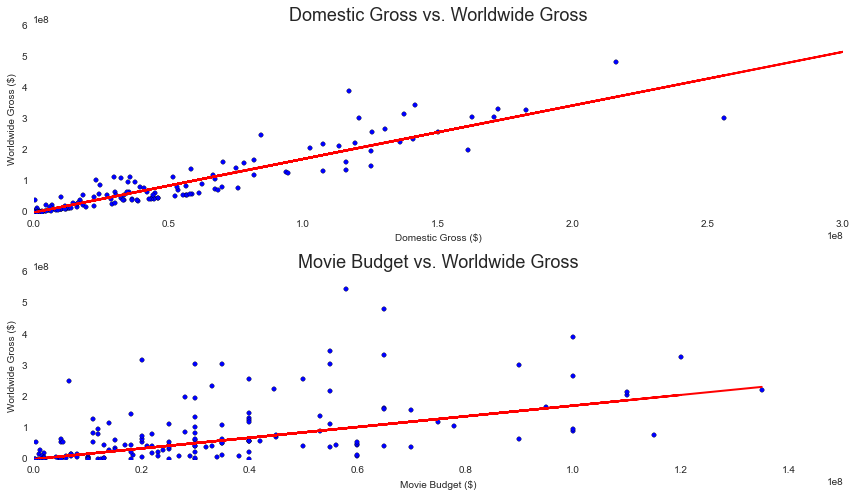

In [9]:
x1=movies.DomesticGross[movies.WorldwideGross<1000000000]
y=movies.WorldwideGross[movies.WorldwideGross<1000000000]
x2=movies.Budget[movies.WorldwideGross<1000000000]

rgr = linear_model.LinearRegression()
rgr2 = linear_model.LinearRegression()
rgr.fit(x1.reshape(len(x1),1),y)
rgr2.fit(x2.reshape(len(x2),1),y)
fig=plt.figure(figsize=(12,10))


ax=fig.add_subplot(3,1,1)
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.reshape(len(x1),1)),color='red',linewidth=2,markersize=1)
ax.set_title('Domestic Gross vs. Worldwide Gross',fontsize=18)
ax.set_xlabel('Domestic Gross ($)',fontsize=10)
ax.set_ylabel('Worldwide Gross ($)',fontsize=10)
plt.ylim([0,600000000])
plt.xlim([0,3e8])
ax.set_axis_bgcolor('white')

ax=fig.add_subplot(3,1,2)
plt.scatter(x2,y)
plt.plot(x2,rgr.predict(x2.reshape(len(x2),1)),color='red',linewidth=2)
ax.set_title('Movie Budget vs. Worldwide Gross',fontsize=18)
ax.set_xlabel('Movie Budget ($)',fontsize=10)
ax.set_ylabel('Worldwide Gross ($)',fontsize=10)
plt.ylim([0,600000000])
plt.xlim([0,1.5e8])
ax.set_axis_bgcolor('white')

fig.tight_layout()

Running regression on training set with all features except genres:

In [8]:
x=movies[['Rating','Runtime','IMDB_Score','OpeningTheaters','OpeningGross','TotalTheaters','Primetime_x','Budget','DomesticGross']]
x=sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     185.9
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           1.23e-74
Time:                        21:45:52   Log-Likelihood:                -2965.9
No. Observations:                 154   AIC:                             5952.
Df Residuals:                     144   BIC:                             5982.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const           -1.354e+08   5.61e+07     -2.413      0.017     -2.46e+08 -2.45e+07
Rating           1.674e+07   7.61e+06      2.200      0.029       1.7e+06  3.18e+07
Runtime          2.163e+05   1.86e+05      1.165      0.246     -1.51e+05  5.83e+05
IMDB_Score       1.004e+07   6.95e+06      1.444      0.151      -3.7e+06  2.38e+07
OpeningTheaters  3.421e+04   8481.559      4.034      0.000      1.74e+04   5.1e+04
OpeningGross       -3.2200      0.805     -4.002      0.000        -4.810    -1.629
TotalTheaters    -5.94e+04   7573.036     -7.843      0.000     -7.44e+04 -4.44e+04
Primetime_x      -2.23e+07   1.04e+07     -2.137      0.034     -4.29e+07 -1.67e+06
Budget              1.0681      0.211      5.057      0.000         0.651     1.486
DomesticGross       2.8166      0.102     27.658      0.000         2.615     3.018
==============================================================================
Omnibus:                       39.007   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.034
Skew:                           0.227   Prob(JB):                    9.91e-120
Kurtosis:                      12.231   Cond. No.                     1.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing Rating, Runtime, IMDB Score:

In [11]:
x=movies[['OpeningTheaters','OpeningGross','TotalTheaters','Primetime_x','Budget','DomesticGross']]
x=sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     267.6
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           1.82e-76
Time:                        21:56:39   Log-Likelihood:                -2970.2
No. Observations:                 154   AIC:                             5954.
Df Residuals:                     147   BIC:                             5976.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             1.16e+07   1.05e+07      1.110      0.269     -9.05e+06  3.23e+07
OpeningTheaters   3.02e+04   8476.941      3.562      0.000      1.34e+04  4.69e+04
OpeningGross       -2.9401      0.810     -3.628      0.000        -4.541    -1.339
TotalTheaters   -5.778e+04   7673.978     -7.530      0.000     -7.29e+04 -4.26e+04
Primetime_x     -2.037e+07   1.06e+07     -1.926      0.056     -4.13e+07  5.26e+05
Budget              1.0789      0.213      5.054      0.000         0.657     1.501
DomesticGross       2.8383      0.102     27.815      0.000         2.637     3.040
==============================================================================
Omnibus:                       43.349   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.563
Skew:                           0.308   Prob(JB):                    1.03e-158
Kurtosis:                      13.630   Cond. No.                     2.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FINAL MODEL: Removing Opening Theaters, Opening Gross, Peak Movie Season 

In [17]:
x=movies[['TotalTheaters','Budget','DomesticGross','Romance']]
x=sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     360.1
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           1.78e-75
Time:                        21:57:41   Log-Likelihood:                -2978.8
No. Observations:                 154   AIC:                             5968.
Df Residuals:                     149   BIC:                             5983.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -3.511e+06   9.67e+06     -0.363      0.717     -2.26e+07  1.56e+07
TotalTheaters -4.265e+04   5671.066     -7.521      0.000     -5.39e+04 -3.14e+04
Budget            1.2031      0.214      5.618      0.000         0.780     1.626
DomesticGross     2.5493      0.092     27.793      0.000         2.368     2.731
Romance        3.459e+07   1.77e+07      1.949      0.053     -4.72e+05  6.96e+07
==============================================================================
Omnibus:                       67.187   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1142.511
Skew:                           1.028   Prob(JB):                    8.07e-249
Kurtosis:                      16.184   Cond. No.                     3.53e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plotting model predictions vs. actuals:

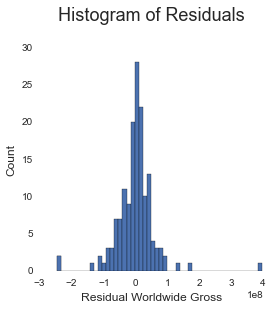

In [18]:
fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
model.resid.hist(bins=50)
ax.set_xlabel('Residual Worldwide Gross',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Histogram of Residuals',fontsize=18)
ttl=ax.title
ttl.set_position([.5, 1.1])
ax.set_axis_bgcolor('white')

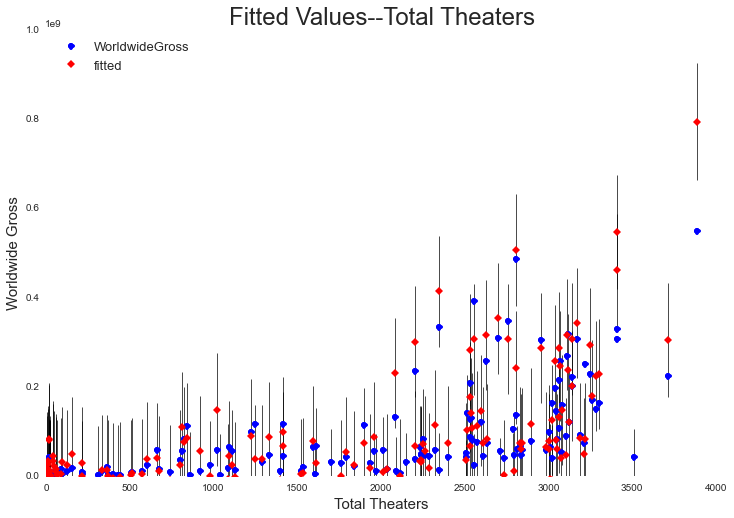

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "TotalTheaters", ax=ax,markersize=5)
ax.set_title('Fitted Values--Total Theaters',fontsize=24)
ax.set_ylim([0,1e9])
ax.set_xlabel('Total Theaters',fontsize=15)
ax.set_ylabel('Worldwide Gross',fontsize=15)
ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':13})

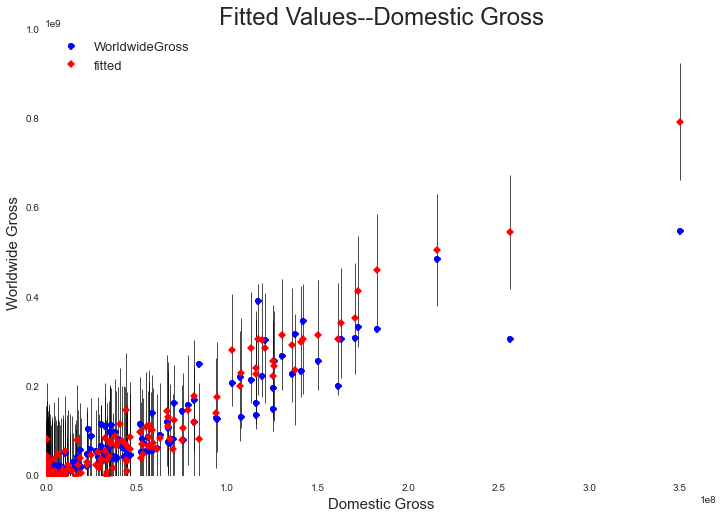

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "DomesticGross", ax=ax,markersize=5)
ax.set_title('Fitted Values--Domestic Gross',fontsize=24)
ax.set_xlim([0,3.7e8])
ax.set_ylim([0,1e9])
ax.set_xlabel('Domestic Gross',fontsize=15)
ax.set_ylabel('Worldwide Gross',fontsize=15)
ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':13})

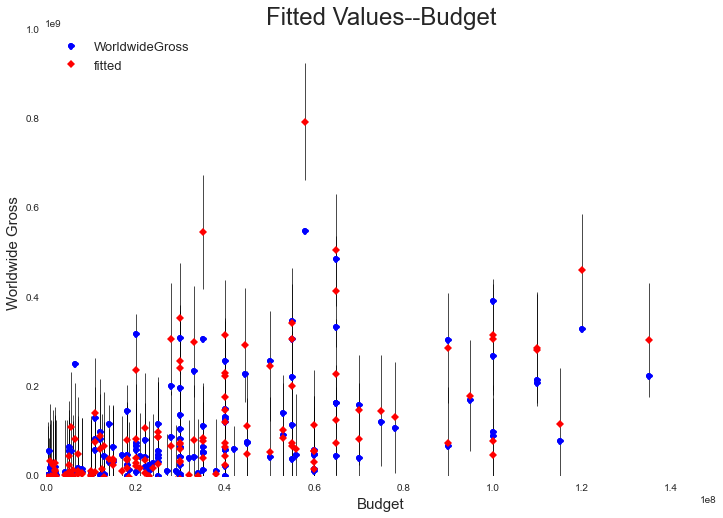

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "Budget", ax=ax,markersize=5)
ax.set_title('Fitted Values--Budget',fontsize=24)
ax.set_xlim([0,1.5e8])
ax.set_ylim([0,1e9])
ax.set_xlabel('Budget',fontsize=15)
ax.set_ylabel('Worldwide Gross',fontsize=15)
ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':13})